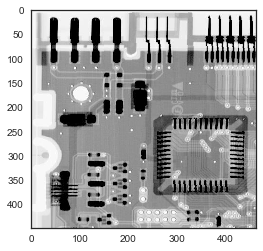

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


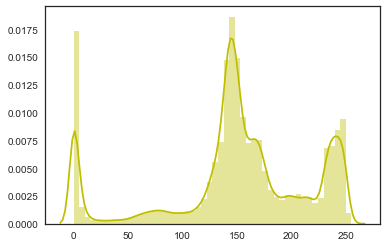

In [ ]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
from scipy.stats.mstats import gmean
from scipy.stats.mstats import hmean
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_CH05_Original_Images/Fig0507(a)(ckt-board-orig).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

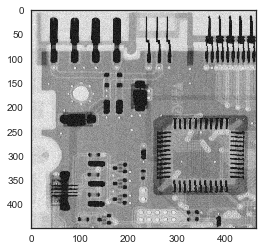

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


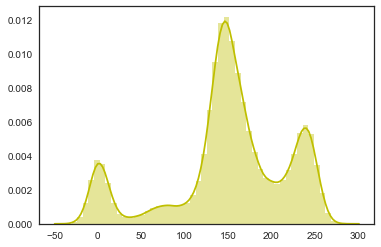

In [46]:
M = im.shape[0]
N = im.shape[1]
gaussian_noise = np.random.normal(0,10,M*N)
gaussian_noise = np.resize(gaussian_noise,(M,N))
im_gaussian_noise = im+gaussian_noise
plt.imshow(im_gaussian_noise)
plt.show()
ax = sns.distplot(im_gaussian_noise.flatten(), color="y")

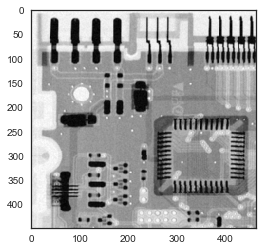

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


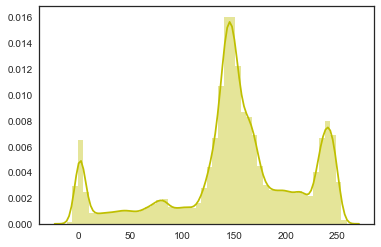

In [47]:
#算術平均濾波器
average_filter = 1/9*np.array([[1,1,1],[1,1,1],[1,1,1]])
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
gaussian_noise_pad = np.pad(im_gaussian_noise, 2, padwithzeros)
output_gaussian = np.zeros(im.shape)
for i in range(M):
    for j in range(N):
        output_gaussian[i][j] = np.sum(np.multiply(gaussian_noise_pad[i:i+average_filter.shape[0],j:j+average_filter.shape[1]],average_filter))
plt.imshow(output_gaussian)
plt.show()
ax = sns.distplot(output_gaussian.flatten(), color="y")

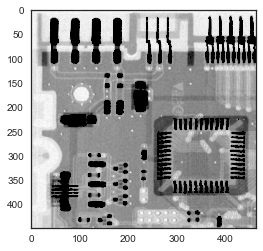

In [44]:
# 幾何平均濾波器
with np.errstate(divide='ignore', invalid='ignore'):
    output_gmean = np.zeros(im.shape)
    for i in range(M):
        for j in range(N):
            output_gmean[i][j] = gmean(gaussian_noise_pad[i:i+average_filter.shape[0],j:j+average_filter.shape[1]].flatten())
# 注意0/0的情況
output_gmean = np.nan_to_num(output_gmean)
# output_gmean[output_gmean<0] = 0
# output_gmean[output_gmean>255] = 255
# output_gmean[output_gmean==np.inf] = 0
plt.imshow(output_gmean)
plt.show()

In [ ]:
# 調和平均濾波器